# Preparation

reference: https://vectorbt.dev/api/portfolio/base/#stats

In [39]:
import vectorbt as vbt

In [ ]:
pf = vbt.Portfolio.load('data/sample_backtest.pkl')

In [33]:
# parameters
column = 0

# Analysis

## Stats

In [25]:
# Retrieve and print the backtesting stats
pf.stats(agg_func=None).T

strategy,strategy_0,strategy_1,strategy_2,strategy_3,strategy_4,strategy_5,strategy_6,strategy_7,strategy_8,strategy_9
Start,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00,2017-08-17 00:00:00+00:00
End,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00
Period,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00,100 days 00:00:00
Start Value,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
End Value,169.93076,180.555276,178.830288,158.822769,177.32849,156.479675,187.117849,178.751552,173.647265,182.063741
Total Return [%],69.93076,80.555276,78.830288,58.822769,77.32849,56.479675,87.117849,78.751552,73.647265,82.063741
Benchmark Return [%],72.606394,72.606394,72.606394,72.606394,72.606394,72.606394,72.606394,72.606394,72.606394,72.606394
Max Gross Exposure [%],100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Total Fees Paid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max Drawdown [%],41.863454,39.10491,39.634549,44.005796,40.062453,44.40387,36.399371,39.65769,41.011843,38.599817


In [ ]:
# Single column stats
pf.stats(column=column)

Start                         2017-08-17 00:00:00+00:00
End                           2017-11-24 00:00:00+00:00
Period                                100 days 00:00:00
Start Value                                       100.0
End Value                                     169.93076
Total Return [%]                               69.93076
Benchmark Return [%]                          72.606394
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              41.863454
Max Drawdown Duration                  73 days 00:00:00
Total Trades                                          6
Total Closed Trades                                   4
Total Open Trades                                     2
Open Trade PnL                                64.412979
Win Rate [%]                                       75.0
Best Trade [%]                                71.398742
Worst Trade [%]                               -4

In [ ]:
# change frequency
pf.stats(column=column, settings=dict(freq='w'))

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:262: UserWarning: Changing the frequency will create a copy of this object. Consider setting it upon object creation to re-use existing cache.
  reself = self.resolve_self(


Start                         2017-08-17 00:00:00+00:00
End                           2017-11-24 00:00:00+00:00
Period                                700 days 00:00:00
Start Value                                       100.0
End Value                                     169.93076
Total Return [%]                               69.93076
Benchmark Return [%]                          72.606394
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              41.863454
Max Drawdown Duration                 511 days 00:00:00
Total Trades                                          6
Total Closed Trades                                   4
Total Open Trades                                     2
Open Trade PnL                                64.412979
Win Rate [%]                                       75.0
Best Trade [%]                                71.398742
Worst Trade [%]                               -4

In [30]:
# metrics selection
pf.stats(metrics=['sharpe_ratio', 'sortino_ratio'], column=0)

Sharpe Ratio     2.508371
Sortino Ratio    3.685121
Name: 0, dtype: float64

In [31]:
# tags selection
# see any metric from Portfolio.metrics that has the tag key
pf.stats(column=column, tags=['trades'])



Total Trades                                 6
Total Closed Trades                          4
Total Open Trades                            2
Open Trade PnL                       64.412979
Win Rate [%]                              75.0
Best Trade [%]                       71.398742
Worst Trade [%]                      -4.668874
Avg Winning Trade [%]                38.912754
Avg Losing Trade [%]                 -4.668874
Avg Winning Trade Duration    53 days 08:00:00
Avg Losing Trade Duration     40 days 00:00:00
Profit Factor                       266.412901
Expectancy                            1.379445
Name: 0, dtype: object

In [34]:
# passing parameters
pf.stats(column=column, settings=dict(required_return=0.1, risk_free=0.01))

Start                         2017-08-17 00:00:00+00:00
End                           2017-11-24 00:00:00+00:00
Period                                100 days 00:00:00
Start Value                                       100.0
End Value                                     169.93076
Total Return [%]                               69.93076
Benchmark Return [%]                          72.606394
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              41.863454
Max Drawdown Duration                  73 days 00:00:00
Total Trades                                          6
Total Closed Trades                                   4
Total Open Trades                                     2
Open Trade PnL                                64.412979
Win Rate [%]                                       75.0
Best Trade [%]                                71.398742
Worst Trade [%]                               -4

In [37]:
# custom metric
max_winning_streak = (
    'max_winning_streak',
    dict(
        title='Max Winning Streak',
        calc_func=lambda trades: trades.winning_streak.max(),
        resolve_trades=True
    )
)
pf.stats(metrics=max_winning_streak, agg_func=None)

,Max Winning Streak
strategy,
strategy_0,2.0
strategy_1,2.0
strategy_2,2.0
strategy_3,2.0
strategy_4,2.0
strategy_5,2.0
strategy_6,2.0
strategy_7,2.0
strategy_8,2.0


In [49]:
# returns stats
pf.returns_stats(column=column)

Start                        2017-08-17 00:00:00+00:00
End                          2017-11-24 00:00:00+00:00
Period                               100 days 00:00:00
Total Return [%]                              69.93076
Benchmark Return [%]                         72.606394
Annualized Return [%]                        592.61645
Annualized Volatility [%]                    95.973284
Max Drawdown [%]                             41.863454
Max Drawdown Duration                 73 days 00:00:00
Sharpe Ratio                                  2.508371
Calmar Ratio                                 14.155938
Omega Ratio                                   1.491832
Sortino Ratio                                 3.685121
Skew                                          -0.65101
Kurtosis                                      4.839102
Tail Ratio                                     0.99267
Common Sense Ratio                            6.875395
Value at Risk                                -0.078121
Alpha     

## Quant stats adapter

In [42]:
# quant stats adapter
pf.qs.sharpe()

strategy
strategy_0    2.508371
strategy_1    2.863234
strategy_2    2.809340
strategy_3    2.142405
strategy_4    2.760360
strategy_5    2.070144
strategy_6    3.012155
strategy_7    2.806813
strategy_8    2.635911
strategy_9    2.907323
dtype: float64

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\base\indexing.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.indexing_func(lambda x: x.__getitem__(key), **self.indexing_kwargs)


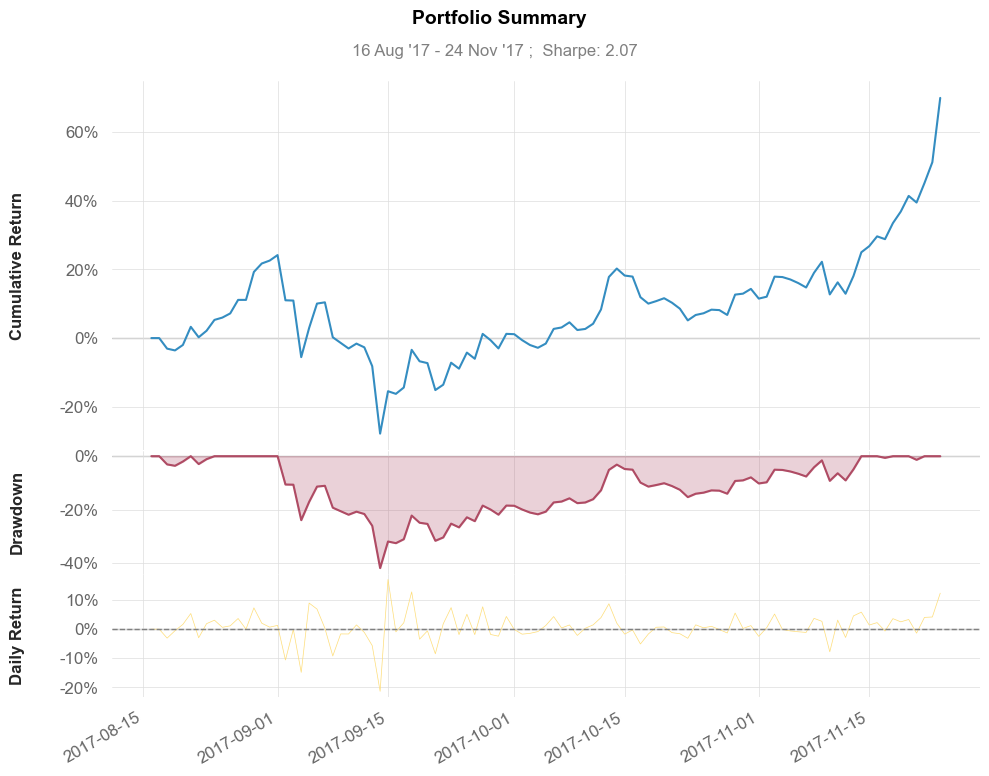

In [43]:
pf[column].qs.plot_snapshot()

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\base\indexing.py:145: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.indexing_func(lambda x: x.__getitem__(key), **self.indexing_kwargs)


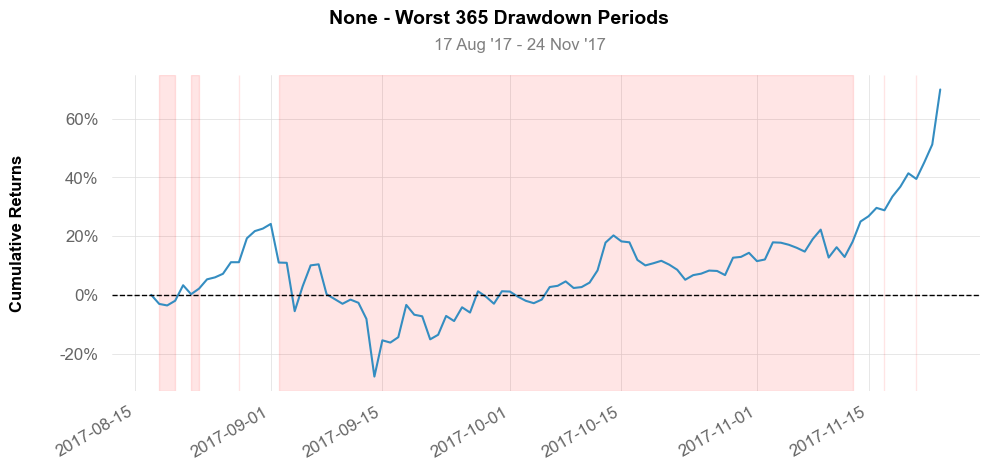

In [47]:
pf[column].qs.plot_drawdowns_periods()


## Plots

In [80]:
import pandas as pd
close = pd.read_csv('data/sample_data.csv',index_col=0).iloc[:,:1]

In [76]:
pf = vbt.Portfolio.from_random_signals(close, n=[10, 20], seed=42)
pf.wrapper.columns

Index([10, 20], dtype='int32', name='randnx_n')

In [81]:
pf.stats()

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

C:\Users\twilc\AppData\Local\Temp\ipykernel_16092\3705677322.py:1: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0x000002C2E04636A0>. Pass column to select a single column/group.



Start                         2017-08-17 00:00:00+00:00
End                           2024-12-31 00:00:00+00:00
Period                                             2694
Start Value                                       100.0
End Value                                    291.288292
Total Return [%]                             191.288292
Benchmark Return [%]                        2083.763197
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              86.655748
Max Drawdown Duration                            1855.5
Total Trades                                       15.0
Total Closed Trades                                15.0
Total Open Trades                                   0.0
Open Trade PnL                                      0.0
Win Rate [%]                                       42.5
Best Trade [%]                               138.459666
Worst Trade [%]                              -49

In [86]:
pf.plot(subplots=['cash', 'value'],column=0).show()

In [ ]:
import numpy as np
def plot_allocation(rb_pf):
    # Plot weights development of the portfolio
    rb_asset_value = rb_pf.asset_value(group_by=False)
    rb_value = rb_pf.value()
    rb_idxs = np.flatnonzero((rb_pf.asset_flow() != 0).any(axis=1))
    rb_dates = rb_pf.wrapper.index[rb_idxs]
    fig = (rb_asset_value.vbt / rb_value).vbt.plot(
        trace_names=symbols,
        trace_kwargs=dict(
            stackgroup='one'
        )
    )
    for rb_date in rb_dates:
        fig.add_shape(
            dict(
                xref='x',
                yref='paper',
                x0=rb_date,
                x1=rb_date,
                y0=0,
                y1=1,
                line_color=fig.layout.template.layout.plot_bgcolor
            )
        )
    fig.show()

plot_allocation(pf)

NameError: name 'np' is not defined

In [82]:
pf.plot(column=column)

c:\Users\twilc\anaconda3\Lib\site-packages\vectorbt\utils\decorators.py:413: UserWarning:

Columns only: Make sure to treat this object as a Series of columns rather than a DataFrame

C:\Users\twilc\AppData\Local\Temp\ipykernel_16092\3370124516.py:1: UserWarning:

Subplot 'orders' raised an exception



IndexingError: Too many indexers

You can choose any of the subplots in https://vectorbt.dev/api/portfolio/base/#vectorbt.portfolio.base.Portfolio.subplots

In [65]:
from vectorbt.utils.colors import adjust_opacity

# Ensure the column is a single column and not a DataFrame
if isinstance(column, list) and len(column) == 1:
    column = column[0]

# Plot the subplots with the specified settings
pf.plot(
    subplots=['drawdowns', 'underwater'],
    column=column,
    subplot_settings=dict(
        drawdowns=dict(top_n=3),
        underwater=dict(
            trace_kwargs=dict(
                line=dict(color='#FF6F00'),
                fillcolor=adjust_opacity('#FF6F00', 0.3)
            )
        )
    )
)

C:\Users\twilc\AppData\Local\Temp\ipykernel_16092\911603685.py:8: UserWarning:

Subplot 'drawdowns' raised an exception



IndexingError: Too many indexers

In [61]:
# new function
def plot_order_size(pf, size, column=None, add_trace_kwargs=None, fig=None):
    size = pf.select_one_from_obj(size, pf.wrapper.regroup(False), column=column)
    size.rename('Order Size').vbt.barplot(
        add_trace_kwargs=add_trace_kwargs, fig=fig)

order_size = pf.orders.size.to_pd(fill_value=0.)
pf.plot(subplots=[
    'orders',
    ('order_size', dict(
        title='Order Size',
        yaxis_kwargs=dict(title='Order size'),
        check_is_not_grouped=True,
        plot_func=plot_order_size
    ))
],
    column=column,
    subplot_settings=dict(
        order_size=dict(
            size=order_size
        )
    )
)

ValueError: Multiple values are pointing to the same position. Use ignore_index.

In [63]:
subplots = [
    ('cumulative_returns', dict(
        title='Cumulative Returns',
        yaxis_kwargs=dict(title='Cumulative returns'),
        plot_func='returns.vbt.returns.cumulative.vbt.plot',
        pass_add_trace_kwargs=True
    )),
    ('rolling_drawdown', dict(
        title='Rolling Drawdown',
        yaxis_kwargs=dict(title='Rolling drawdown'),
        plot_func=[
            'returns.vbt.returns',  # returns accessor
            (
                'rolling_max_drawdown',  # function name
                (vbt.Rep('window'),)),  # positional arguments
            'vbt.plot'  # plotting function
        ],
        pass_add_trace_kwargs=True,
        trace_names=[vbt.Sub('rolling_drawdown(${window})')],  # add window to the trace name
    ))
]
pf.plot(
    subplots,
    column=column,
    subplot_settings=dict(
        rolling_drawdown=dict(
            template_mapping=dict(
                window=10
            )
        )
    )
)

C:\Users\twilc\AppData\Local\Temp\ipykernel_16092\3174818432.py:22: UserWarning:

Subplot 'cumulative_returns' raised an exception



AssertionError: Axis 1 of (100, 10) and axis 0 of (1,) do not match